In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:
# Load Customers & Transactions data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Display first few rows
customers.head(), transactions.head()

(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  )

In [3]:
# Total spent per customer
customer_spending = transactions.groupby("CustomerID")["TotalValue"].sum().reset_index()
customer_spending.columns = ["CustomerID", "TotalSpent"]

# Number of transactions per customer
customer_txn_count = transactions.groupby("CustomerID")["TransactionID"].count().reset_index()
customer_txn_count.columns = ["CustomerID", "TotalTransactions"]

# Merge transaction data with Customers.csv
customer_data = customers.merge(customer_spending, on="CustomerID", how="left").merge(customer_txn_count, on="CustomerID", how="left")

# Fill missing values with 0
customer_data.fillna(0, inplace=True)

# Display the prepared dataset
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,TotalSpent,TotalTransactions
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3.0


In [4]:
# Select numerical features for clustering
features = ["TotalSpent", "TotalTransactions"]

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[features])

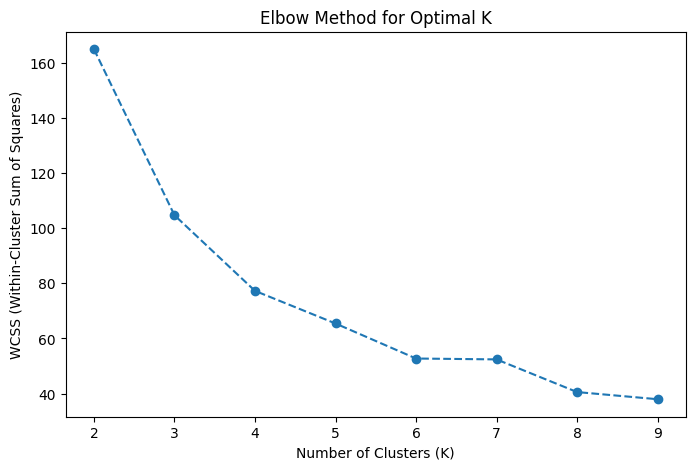

In [5]:
# Determine the optimal number of clusters (K)
wcss = []  # Within-Cluster Sum of Squares
K_range = range(2, 10)  # Checking K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [6]:
# Apply K-Means with chosen K
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(scaled_data)

# Display cluster assignments
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,TotalSpent,TotalTransactions,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5.0,2
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4.0,1
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4.0,1
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8.0,0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3.0,1


In [7]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, customer_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.7963338823953641


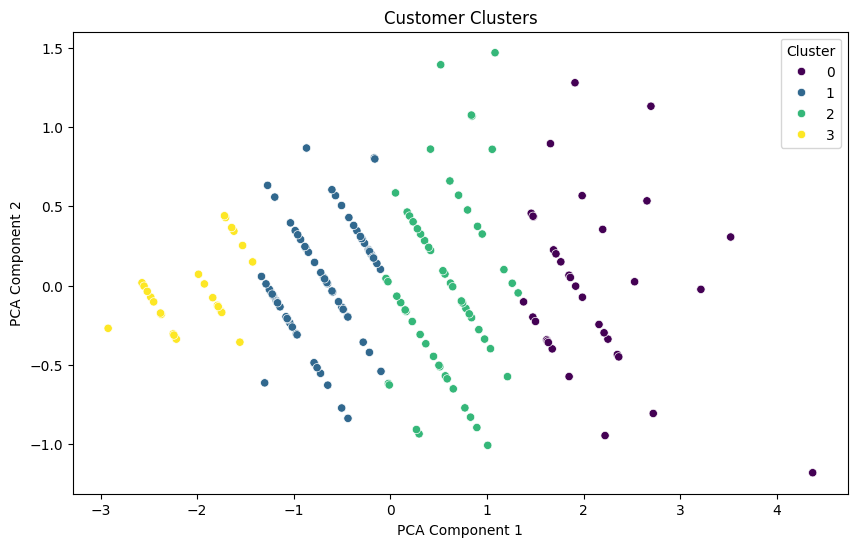

In [8]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
customer_data["PCA1"] = pca_data[:, 0]
customer_data["PCA2"] = pca_data[:, 1]

# Plot the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x="PCA1", y="PCA2", hue="Cluster", palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Clusters")
plt.show()

In [9]:
# Save clustered data
customer_data.to_csv("FirstName_LastName_Clustering.csv", index=False)
print("Clustering results saved successfully!")

Clustering results saved successfully!
